<a href="https://colab.research.google.com/github/Gajalakshmisubramani/windmill_data-analysis/blob/main/windmill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time
%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

In [ ]:
data = pd.read_csv("T1.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


data Wrangling

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26997 entries, 0 to 26996
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      26997 non-null  object 
 1   LV ActivePower (kW)            26997 non-null  float64
 2   Wind Speed (m/s)               26996 non-null  float64
 3   Theoretical_Power_Curve (KWh)  26996 non-null  float64
 4   Wind Direction (°)             26996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.0+ MB


In [ ]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,26997.000000,26996.000000,26996.000000,26996.000000
mean,1203.620365,7.372774,1403.604789,138.539855
std,1310.106437,4.457791,1369.847718,92.290580
min,-2.471405,0.000000,0.000000,0.000000
25%,0.000000,3.797973,92.476006,56.113985
50%,630.002380,6.754872,909.355900,122.831947
75%,2267.590088,10.011567,2799.273303,208.777550
max,3618.732910,25.206011,3600.000000,359.977295


In [ ]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 1
Theoretical_Power_Curve (KWh)    1
Wind Direction (°)               1
dtype: int64

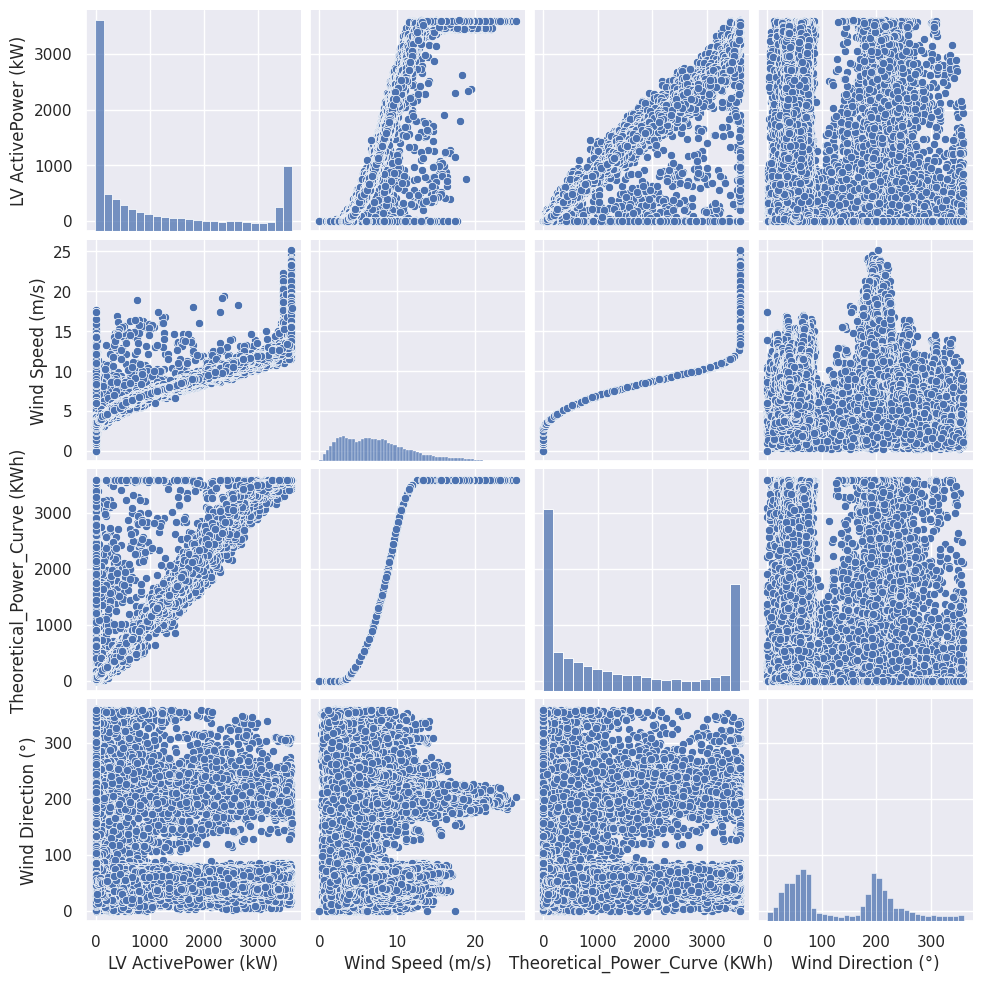

In [ ]:
sns.pairplot(data)

<ipython-input-8-c179d91a00ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


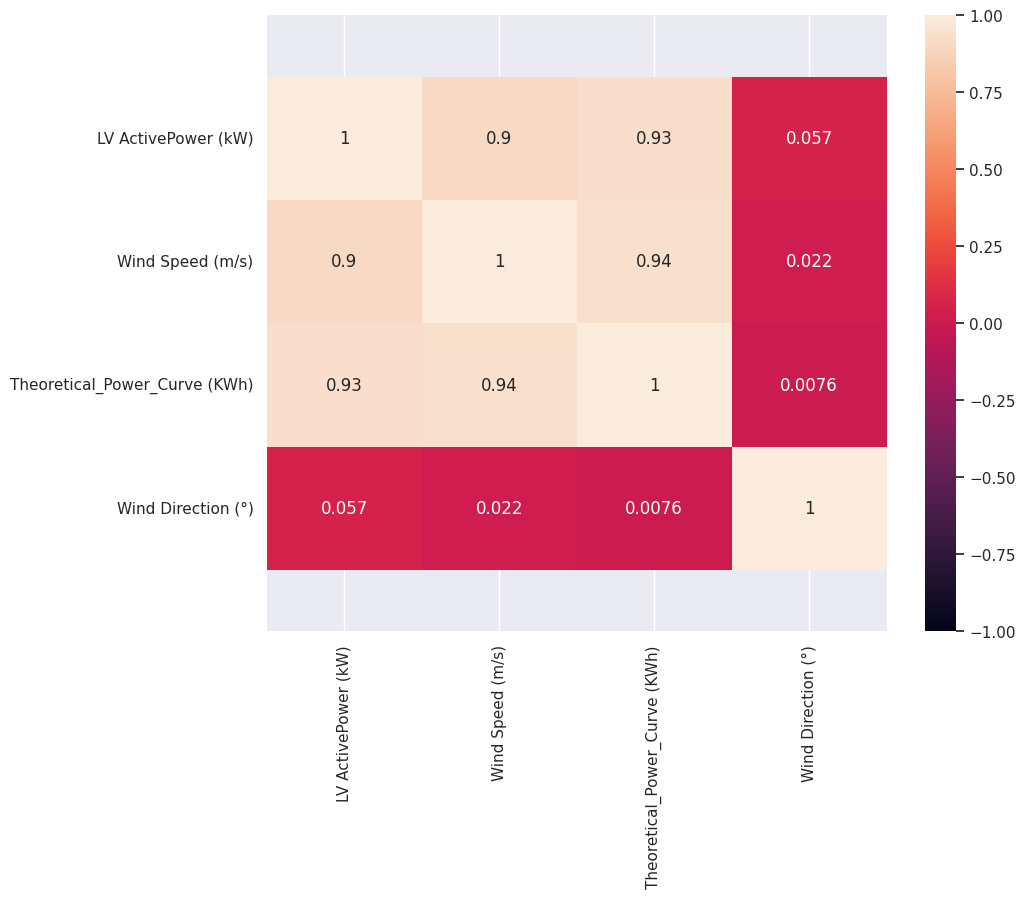

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.898668,0.932255,0.057039
Wind Speed (m/s),0.898668,1.000000,0.940934,0.022135
Theoretical_Power_Curve (KWh),0.932255,0.940934,1.000000,0.007637
Wind Direction (°),0.057039,0.022135,0.007637,1.000000


In [ ]:
corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [ ]:
! pip install windrose

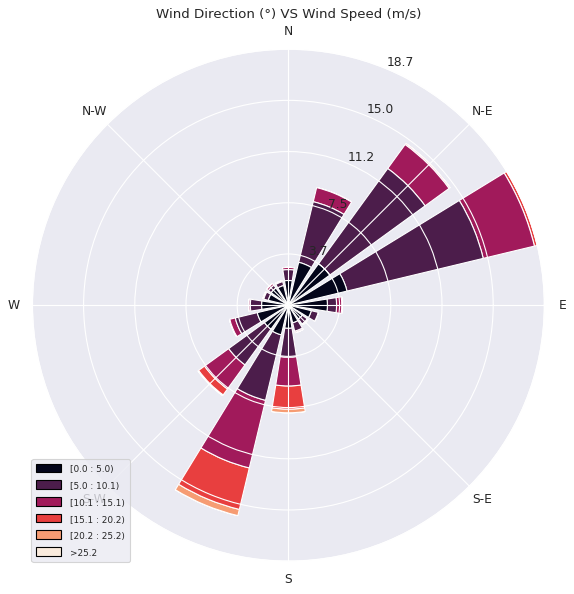

In [ ]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

In [ ]:
data['Year']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[0])
data['Month']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[1])
data['Day']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[2])
data['Time_Hours']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[3])
data['Time_Minutes']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head(10)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,2018,1,1,0,50
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,2018,1,1,1,0
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,2018,1,1,1,10
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,2018,1,1,1,20
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,2018,1,1,1,30


<ipython-input-12-330cd63a0373>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)
<ipython-input-12-330cd63a0373>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)
<ipython-input-12-330cd63a0373>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)
<ipython-input-12-330cd63a0373>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)


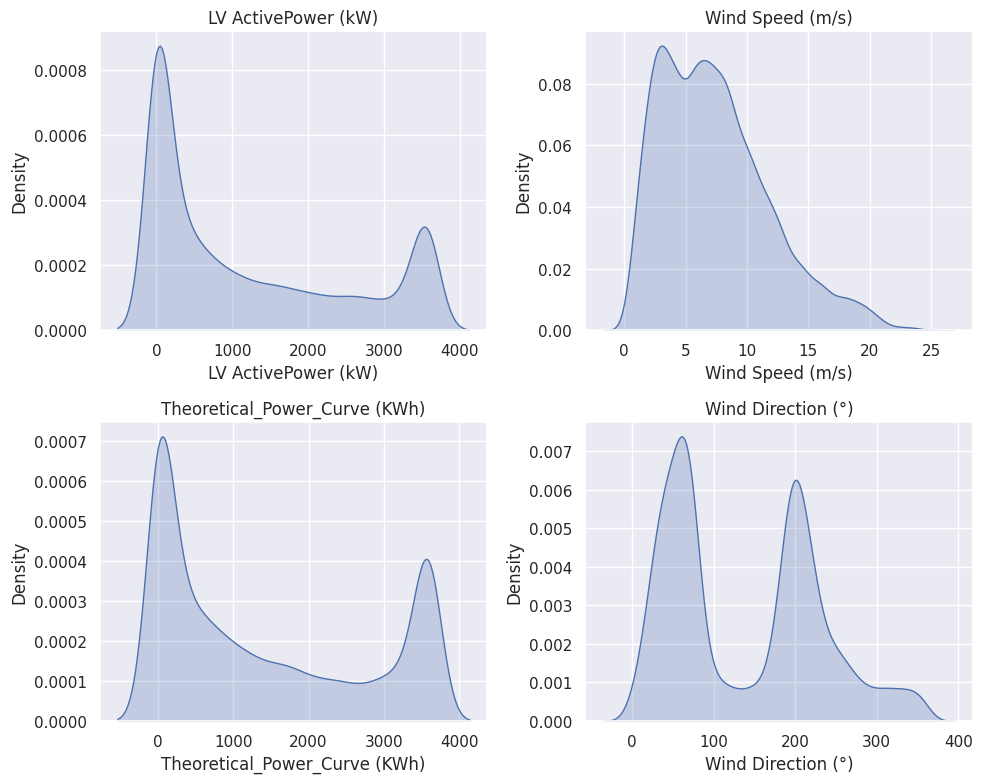

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data.iloc[:,i+1], shade=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

In [ ]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
26992,2018-07-12 16:10:00,1772.042969,8.975777,2128.386934,40.307789,2018,7,12,16,10
26993,2018-07-12 16:20:00,1621.598022,8.633357,1910.844609,39.097771,2018,7,12,16,20
26994,2018-07-12 16:30:00,1586.517944,8.562090,1866.418255,39.800350,2018,7,12,16,30
26995,2018-07-12 16:40:00,1347.194946,8.010880,1536.233655,41.828629,2018,7,12,16,40


In [ ]:
# Droping all the irrelavent features that dosent affect the target variable.
cols = ["Wind Direction (°)", 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


In [ ]:
df = data.copy()

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

<ipython-input-17-66b0dd25839b>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
df = df.set_index('Date/Time')
# converting the Data/Time as the index for proper shape of the input

In [ ]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [ ]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [ ]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [ ]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)

In [ ]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [ ]:
'''Drop all the features as we will not be having any in production'''
del df['LV ActivePower (kW)']
del df['Wind Speed (m/s)']
df.head()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-01-01 00:00:00,416.328908
2018-01-01 00:10:00,519.917511
2018-01-01 00:20:00,390.900016
2018-01-01 00:30:00,516.127569
2018-01-01 00:40:00,491.702972


In [ ]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-07-12 14:30:00,1646.231913
2018-07-12 14:40:00,1697.659160
2018-07-12 14:50:00,2162.096828
2018-07-12 15:00:00,2189.753394
2018-07-12 15:10:00,2136.415074


In [ ]:
# transform data to be stationary
raw_values = df.values
diff_values = difference(raw_values, 1)


In [ ]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [ ]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [ ]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

25986/25986 [==============================] - 78s 3ms/step - loss: 0.0057


In [ ]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 29ms/step
Hour=1, Predicted=815.228917, Expected=725.619629
1/1 [==============================] - 0s 36ms/step
Hour=2, Predicted=715.730063, Expected=1027.951064
1/1 [==============================] - 0s 31ms/step
Hour=3, Predicted=1029.374428, Expected=1877.066580
1/1 [==============================] - 0s 43ms/step
Hour=4, Predicted=1867.963629, Expected=2344.135964
1/1 [==============================] - 0s 32ms/step
Hour=5, Predicted=2328.632236, Expected=1995.484782
1/1 [==============================] - 0s 31ms/step
Hour=6, Predicted=1984.475286, Expected=1675.355264
1/1 [==============================] - 0s 27ms/step
Hour=7, Predicted=1673.108659, Expected=1797.863291
1/1 [==============================] - 0s 30ms/step
Hour=8, Predicted=1787.271639, Expected=1412.115103
1/1 [==============================] - 0s 22ms/step
Hour=9, Predicted=1402.169462, Expected=1462.126982
1/1 [==============================] - 0s 23ms/step
Hour=10, Predic